### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Code starts here
# read data
df = pd.read_csv('../file/train.csv')
df.head()
# Code ends here.

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,8,155.8800,202,2469,4.7,1,4.9,9,4.7,7,0
1,26,19.9900,9,252,4.8,0,4.6,39,4.6,20,1
2,26,91.6980,56,659,4.6,0,4.6,34,3.9,4,2
3,11,24.3878,1,19,3.0,5,4.0,13,4.0,10,3
4,7,609.9878,84,4016,4.5,1,3.9,34,3.5,10,4


### Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

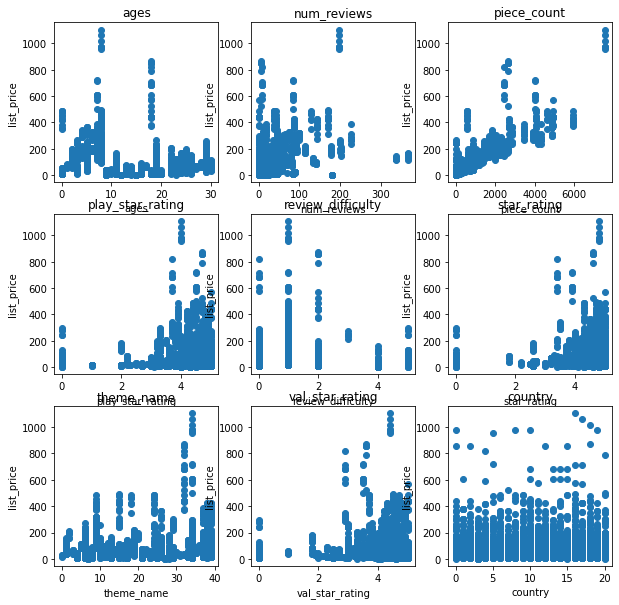

In [5]:
# Code starts here
from sklearn.model_selection import train_test_split
X = df.drop('list_price',axis=1)
y = df['list_price']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=6)

cols = X_train.columns
fig, axes = plt.subplots(3,3,figsize=(10,10))
for i in range (0,3):
    for j in range (0,3):
        col = cols[ i * 3 + j]
        axes[i,j].set_title(col)
        axes[i,j].scatter(X_train[col], y_train)
        axes[i,j].set_xlabel(col)
        axes[i,j].set_ylabel('list_price')
plt.show()
# Code ends here.

### Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

In [6]:
# Code starts here
corr = X_train.corr()
corr
# Code ends here.

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
ages,1.000000,-0.162116,-0.087653,0.230874,-0.248484,0.102732,0.477431,0.119316,-0.016430,0.005607
num_reviews,-0.162116,1.000000,0.550229,0.154845,-0.197409,0.163444,0.017316,0.172836,0.009128,-0.010630
piece_count,-0.087653,0.550229,1.000000,0.171522,-0.312137,0.180946,0.173384,0.194085,0.009986,-0.005375
play_star_rating,0.230874,0.154845,0.171522,1.000000,-0.674571,0.901349,0.149534,0.922697,-0.004127,-0.008526
review_difficulty,-0.248484,-0.197409,-0.312137,-0.674571,1.000000,-0.641694,-0.162326,-0.655544,0.000894,0.011113
star_rating,0.102732,0.163444,0.180946,0.901349,-0.641694,1.000000,0.062220,0.907234,-0.007335,-0.014479
theme_name,0.477431,0.017316,0.173384,0.149534,-0.162326,0.062220,1.000000,0.098476,-0.018460,-0.012110
val_star_rating,0.119316,0.172836,0.194085,0.922697,-0.655544,0.907234,0.098476,1.000000,0.004605,-0.020514
country,-0.016430,0.009128,0.009986,-0.004127,0.000894,-0.007335,-0.018460,0.004605,1.000000,-0.018443
Id,0.005607,-0.010630,-0.005375,-0.008526,0.011113,-0.014479,-0.012110,-0.020514,-0.018443,1.000000


In [7]:
X_train.drop(['play_star_rating', 'val_star_rating'],axis = 1, inplace=True)
X_test.drop(['play_star_rating', 'val_star_rating'],axis = 1, inplace=True)

### Model building

In [24]:
# Code starts here
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('mse = ', mse)
print('r2 = ',r2)
# Code ends here.

mse =  2385.5374041892105
r2 =  0.7327803752210252


### Residual check!

- Check the distribution of the residual.

In [25]:
# Code starts here
residual = y_test - y_pred
print('residual = ', residual)
# Code ends here.

residual =  6272    -2.534009
1262   -12.660594
8379    -8.993568
4989    24.061132
6452   -15.288260
          ...    
5985   -31.612582
7490   -14.126364
3974   -17.615743
7868    25.331898
7750    -4.513808
Name: list_price, Length: 2575, dtype: float64


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [22]:
# Code starts here
df1 = pd.read_csv('../file/test.csv')
df1.head()
# Code ends here.

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,26,8,941,4.6,0,4.6,33,4.3,16,9907
1,11,0,19,0.0,5,0.0,13,0.0,7,5243
2,29,34,1376,4.0,1,4.3,34,3.8,12,8276
3,26,0,369,0.0,5,0.0,28,0.0,9,6501
4,11,1,19,3.0,5,4.0,13,4.0,0,1619


In [38]:
Id = pd.DataFrame(df1['Id'])

In [39]:
Id.head()

,Id
0,9907
1,5243
2,8276
3,6501
4,1619


In [26]:
df1.drop(['play_star_rating', 'val_star_rating'],axis = 1, inplace=True)

In [27]:
pred = regressor.predict(df1)

In [34]:
pred

array([113.79925607,  24.02232249, 148.46260003, ...,  25.84575929,
        16.37954752,  18.27973144])

In [43]:
prediction = pd.DataFrame(pred)
sub = pd.DataFrame()
sub['Id'] = df1.Id
sub['Price'] = prediction.astype('int64')
sub.to_csv('../file/final_submission.csv',index=False)